# Diabetes Prediction 

In [1]:
# Importing the modules
import pandas as pd 
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings("ignore")

In [2]:
#reading the input file and getting the column info
diabetes = pd.read_csv('data/2015.csv')
diabetes.head(10)

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENUM,...,_PAREC1,_PASTAE1,_LMTACT1,_LMTWRK1,_LMTSCL1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
0,1.0,1.0,b'01292015',b'01',b'29',b'2015',1200.0,2.015000e+09,2.015000e+09,1.0,...,4.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,1.0
1,1.0,1.0,b'01202015',b'01',b'20',b'2015',1100.0,2.015000e+09,2.015000e+09,1.0,...,2.0,2.0,3.0,3.0,4.0,2.0,2.0,NaN,NaN,2.0
2,1.0,1.0,b'02012015',b'02',b'01',b'2015',1200.0,2.015000e+09,2.015000e+09,1.0,...,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,NaN
3,1.0,1.0,b'01142015',b'01',b'14',b'2015',1100.0,2.015000e+09,2.015000e+09,1.0,...,4.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,9.0
4,1.0,1.0,b'01142015',b'01',b'14',b'2015',1100.0,2.015000e+09,2.015000e+09,1.0,...,4.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,1.0
5,1.0,1.0,b'01142015',b'01',b'14',b'2015',1100.0,2.015000e+09,2.015000e+09,1.0,...,2.0,2.0,1.0,2.0,3.0,1.0,1.0,1.0,1.0,2.0
6,1.0,1.0,b'01052015',b'01',b'05',b'2015',1100.0,2.015000e+09,2.015000e+09,1.0,...,2.0,2.0,3.0,3.0,4.0,1.0,1.0,2.0,1.0,1.0
7,1.0,1.0,b'01142015',b'01',b'14',b'2015',1100.0,2.015000e+09,2.015000e+09,1.0,...,4.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
8,1.0,1.0,b'01132015',b'01',b'13',b'2015',1100.0,2.015000e+09,2.015000e+09,1.0,...,9.0,9.0,2.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0
9,1.0,1.0,b'01302015',b'01',b'30',b'2015',1100.0,2.015000e+09,2.015000e+09,1.0,...,2.0,2.0,3.0,3.0,4.0,1.0,2.0,2.0,2.0,2.0


In [3]:
print(f'The number of rows are {diabetes.shape[0] } and the number of columns are {diabetes.shape[1]}')

The number of rows are 441456 and the number of columns are 330


In [4]:
#getting datatypes and detailed info about the data
diabetes.info()
diabetes.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 441456 entries, 0 to 441455
Columns: 330 entries, _STATE to _AIDTST3
dtypes: float64(323), object(7)
memory usage: 1.1+ GB


_STATE      float64
FMONTH      float64
IDATE        object
IMONTH       object
IDAY         object
             ...   
_RFSEAT2    float64
_RFSEAT3    float64
_FLSHOT6    float64
_PNEUMO2    float64
_AIDTST3    float64
Length: 330, dtype: object

In [3]:
diab=diabetes.copy()

In [4]:
#drop the columns if they start with _ since they are not required for diabetes prediction
for cols in diab.columns:
    if cols.startswith("_") and cols!="RACE":
        diab.drop(cols,axis=1,inplace=True)
print(diab.shape)

(441456, 254)


In [5]:
#creating dataframes
df=pd.DataFrame(diab)

In [6]:
#getting the datatypes of each column so as to reduce the unnecessary datatypes
diab.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 441456 entries, 0 to 441455
Data columns (total 254 columns):
 #   Column    Dtype  
---  ------    -----  
 0   FMONTH    float64
 1   IDATE     object 
 2   IMONTH    object 
 3   IDAY      object 
 4   IYEAR     object 
 5   DISPCODE  float64
 6   SEQNO     float64
 7   CTELENUM  float64
 8   PVTRESD1  float64
 9   COLGHOUS  float64
 10  STATERES  float64
 11  CELLFON3  float64
 12  LADULT    float64
 13  NUMADULT  float64
 14  NUMMEN    float64
 15  NUMWOMEN  float64
 16  CTELNUM1  float64
 17  CELLFON2  float64
 18  CADULT    float64
 19  PVTRESD2  float64
 20  CCLGHOUS  float64
 21  CSTATE    float64
 22  LANDLINE  float64
 23  HHADULT   float64
 24  GENHLTH   float64
 25  PHYSHLTH  float64
 26  MENTHLTH  float64
 27  POORHLTH  float64
 28  HLTHPLN1  float64
 29  PERSDOC2  float64
 30  MEDCOST   float64
 31  CHECKUP1  float64
 32  BPHIGH4   float64
 33  BPMEDS    float64
 34  BLOODCHO  float64
 35  CHOLCHK   float64
 36  TOLDHI2  

In [7]:
#finding all the columns with datatype "object"
object_columns = []
for column in df.columns:
    if(df[column].dtypes==object):
        object_columns.append(column)
print(object_columns)

['IDATE', 'IMONTH', 'IDAY', 'IYEAR', 'PCDMDECN', 'EXACTOT1', 'EXACTOT2']


In [8]:
#removing the columns with datatype "object"
df.drop(['IDATE'],axis=1,inplace=True)
df.drop(['IMONTH'],axis=1,inplace=True)
df.drop(['IDAY'],axis=1,inplace=True)
df.drop(['IYEAR'],axis=1,inplace=True)
df.drop(['PCDMDECN'],axis=1,inplace=True)
df.drop(['EXACTOT1'],axis=1,inplace=True)
df.drop(['EXACTOT2'],axis=1,inplace=True)
print(df.shape)

(441456, 247)


In [9]:
#drop all the columns which have same values thrughout since they do not determine what output would be
non_important_columns = df.std()[df.std() == 0].index
print(non_important_columns)
df.drop(non_important_columns, axis=1, inplace=True)
df.shape

Index(['CTELENUM', 'COLGHOUS', 'STATERES', 'CTELNUM1', 'CCLGHOUS'], dtype='object')


(441456, 242)

In [10]:
#check for missing values percentages in every column
df.isnull().sum().sort_values(ascending=False)/len(df)

PAINACT2    1.000000
QLMENTL2    1.000000
QLSTRES2    1.000000
QLHLTH2     1.000000
LADULT      0.999898
              ...   
CVDSTRK3    0.000000
CVDINFR4    0.000000
BLOODCHO    0.000000
DROCDY3_    0.000000
FMONTH      0.000000
Length: 242, dtype: float64

In [11]:
# removing columns PAINACT2, QLMENTL2, QLSTRES2, QLHLTH2 since it has all null values
df.drop(['PAINACT2'],axis=1,inplace=True)
df.drop(['QLMENTL2'],axis=1,inplace=True)
df.drop(['QLSTRES2'],axis=1,inplace=True)
df.drop(['QLHLTH2'],axis=1,inplace=True)
df.shape

(441456, 238)

<AxesSubplot:>

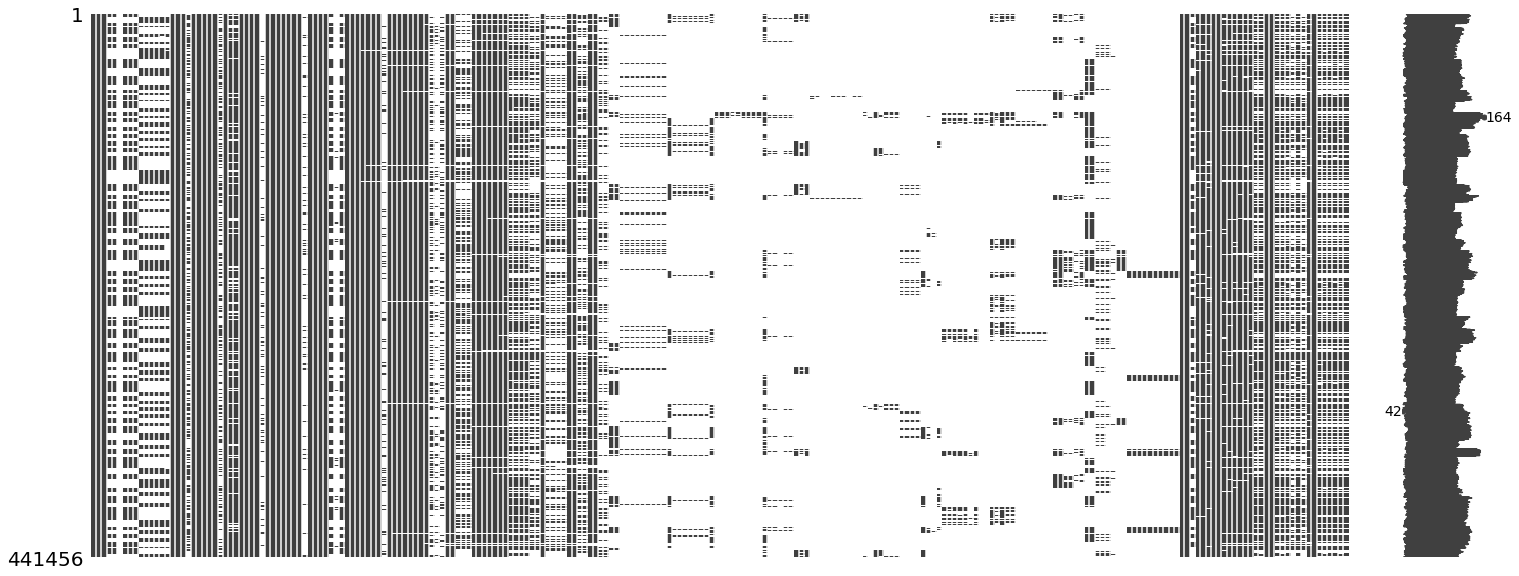

In [14]:
#visualizing the data
#white spaces here represent the missing values
msno.matrix(df)

In [12]:
#filling missing values with -1
df1=df.fillna(-1)
df1.shape

(441456, 238)

<AxesSubplot:>

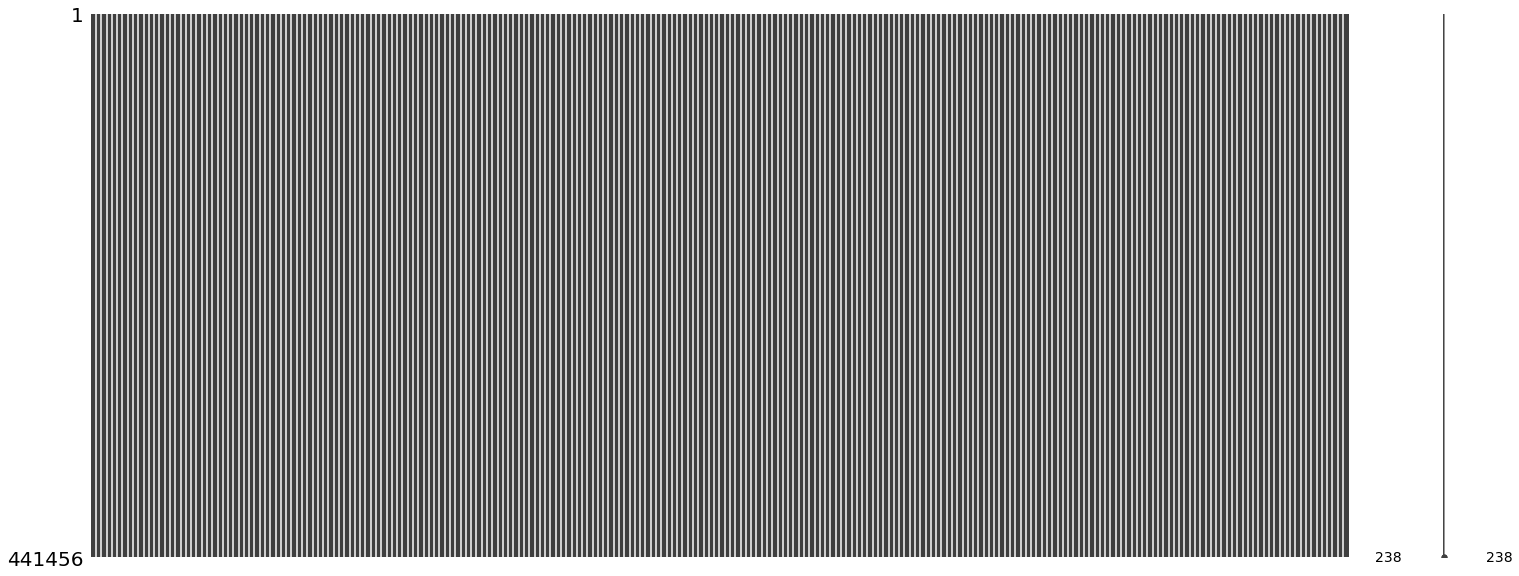

In [13]:
#Visualizing the data after filling missing values
msno.matrix(df1)

In [14]:
#Checking percentage of missing data in every column after filling the missing values

(df1.isnull().sum().sort_values(ascending=False)/len(df1))*100

PA1VIGM_    0.0
FVBEANS     0.0
LMTJOIN3    0.0
STRENGTH    0.0
EXERHMM2    0.0
           ... 
ARTHWGT     0.0
ARTTODAY    0.0
RDUCSTRK    0.0
RDUCHART    0.0
FMONTH      0.0
Length: 238, dtype: float64

In [15]:
#checking the values and frequency of the values in the column DIABETE3 according to codebook which states:
#Value     Value Label                                         Frequency 
#1          Yes                                                 57,256 
#2          Yes, but female told only during pregnancy          3608
#3          No                                                  372,104 
#4          No, pre-diabetes or borderline diabetes             7,690 
#7          Don’t know/Not Sure                                 598 
#9          Refused                                             193 
#BLANK      Not asked or Missing                                7
prediction=df1[['DIABETE3']]
value1 = prediction["DIABETE3"].value_counts()
value1

 3.0    372104
 1.0     57256
 4.0      7690
 2.0      3608
 7.0       598
 9.0       193
-1.0         7
Name: DIABETE3, dtype: int64

In [16]:
# removing the outliers
print('Shape of DataFrame Before Removing Outliers', df1.shape )
df1=df1[(np.abs(stats.zscore(df1)) < 3).all(axis=1)]
print('Shape of DataFrame After Removing Outliers', df1.shape )

Shape of DataFrame Before Removing Outliers (441456, 238)
Shape of DataFrame After Removing Outliers (99360, 238)


In [17]:
#splitting the data into train and test
predictionX = df1.loc[:, df1.columns != 'DIABETE3']
predictionY = df1['DIABETE3']
x_train, x_test, y_train, y_test = train_test_split(predictionX, predictionY, test_size=0.2, train_size = 0.8,)

In [18]:
x_test.to_csv("testdata.csv",index=False)

In [24]:
small_sizedataset = df1.sample(frac = .02,random_state=42);
small_sizedataset.to_csv('./data/data_test.csv', index=False)
small_sizedataset.shape

(1987, 238)

In [19]:
# implementing logistic regression and checking its accuracy score and f1-score
model = LogisticRegression(max_iter=500)
model.fit(x_train, y_train)
predicted=model.predict(x_test)

conf = confusion_matrix(y_test, predicted)
print ("The accuracy of Logistic Regression is : ", accuracy_score(y_test, predicted)*100, "%")
print()
print("F1 score for logistic regression is :",f1_score(y_test, predicted,average='weighted')*100, "%")

The accuracy of Logistic Regression is :  91.39995974235104 %

F1 score for logistic regression is : 87.29314940451277 %


In [20]:
# implementing XGBoost and checking its accuracy score and f1-score
xgbc = XGBClassifier(objective='binary:logistic')
xgbc.fit(x_train,y_train)
predicted = xgbc.predict(x_test)
print ("The accuracy of XGBoost is : ", accuracy_score(y_test, predicted)*100, "%")
print()
print("F1 score for XGBoost is :",f1_score(y_test, predicted,average='weighted')*100, "%")

[20:24:39] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
The accuracy of XGBoost is :  97.68518518518519 %

F1 score for XGBoost is : 96.60189118743617 %


In [21]:
# implementing Gaussian Naive bayes and checking its accuracy score and f1-score
model = GaussianNB()
model.fit(x_train, y_train)
  
predicted = model.predict(x_test)
  
print("The accuracy of Gaussian Naive Bayes model is : ", accuracy_score(y_test, predicted)*100, "%")
print()
print("F1 score for Gaussian Naive Bayes is :",f1_score(y_test, predicted,average='weighted')*100, "%")

The accuracy of Gaussian Naive Bayes model is :  91.44021739130434 %

F1 score for Gaussian Naive Bayes is : 93.33312787587242 %


In [22]:
# implementing Random forest and checking its accuracy score and f1-score
model = RandomForestRegressor(n_estimators = 100, random_state = 0)  
model.fit(x_train, y_train)  
predicted = model.predict(x_test)
print("The accuracy of Random Forest is : ", accuracy_score(y_test, predicted.round(0))*100, "%")

The accuracy of Random Forest is :  97.73550724637681 %


In [23]:
# Performing Decision tree with giniIndex.
model = DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=3, min_samples_leaf=5)
model.fit(x_train, y_train)
predicted = model.predict(x_test)   
print ("Accuracy : ",accuracy_score(y_test,predicted)*100)
print()
print("F1 score for decision tree is :",f1_score(y_test, predicted,average='weighted')*100, "%")  

Accuracy :  97.74557165861513

F1 score for decision tree is : 96.63208979739326 %


In [25]:
# Conclusion- The best accuracy and f1-score was achieved by Decision tree 